In [95]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [96]:
hdf = pd.read_csv('housing.csv') # читаем данные с файла

Осмотр данных 

In [97]:
hdf.shape # количество строк и столбцов

(20640, 10)

In [98]:
hdf.head(6) # на просмотр первые 5 строк

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


In [99]:
hdf.info() # количество нулевых строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [100]:
hdf.describe() # основные функции количество, средняя, станд отклонение, минимальное знач, максимальное знач, квартили

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [101]:
hdf['ocean_proximity'].value_counts() # количество по каждой категории категориального столбца

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Гистограммы

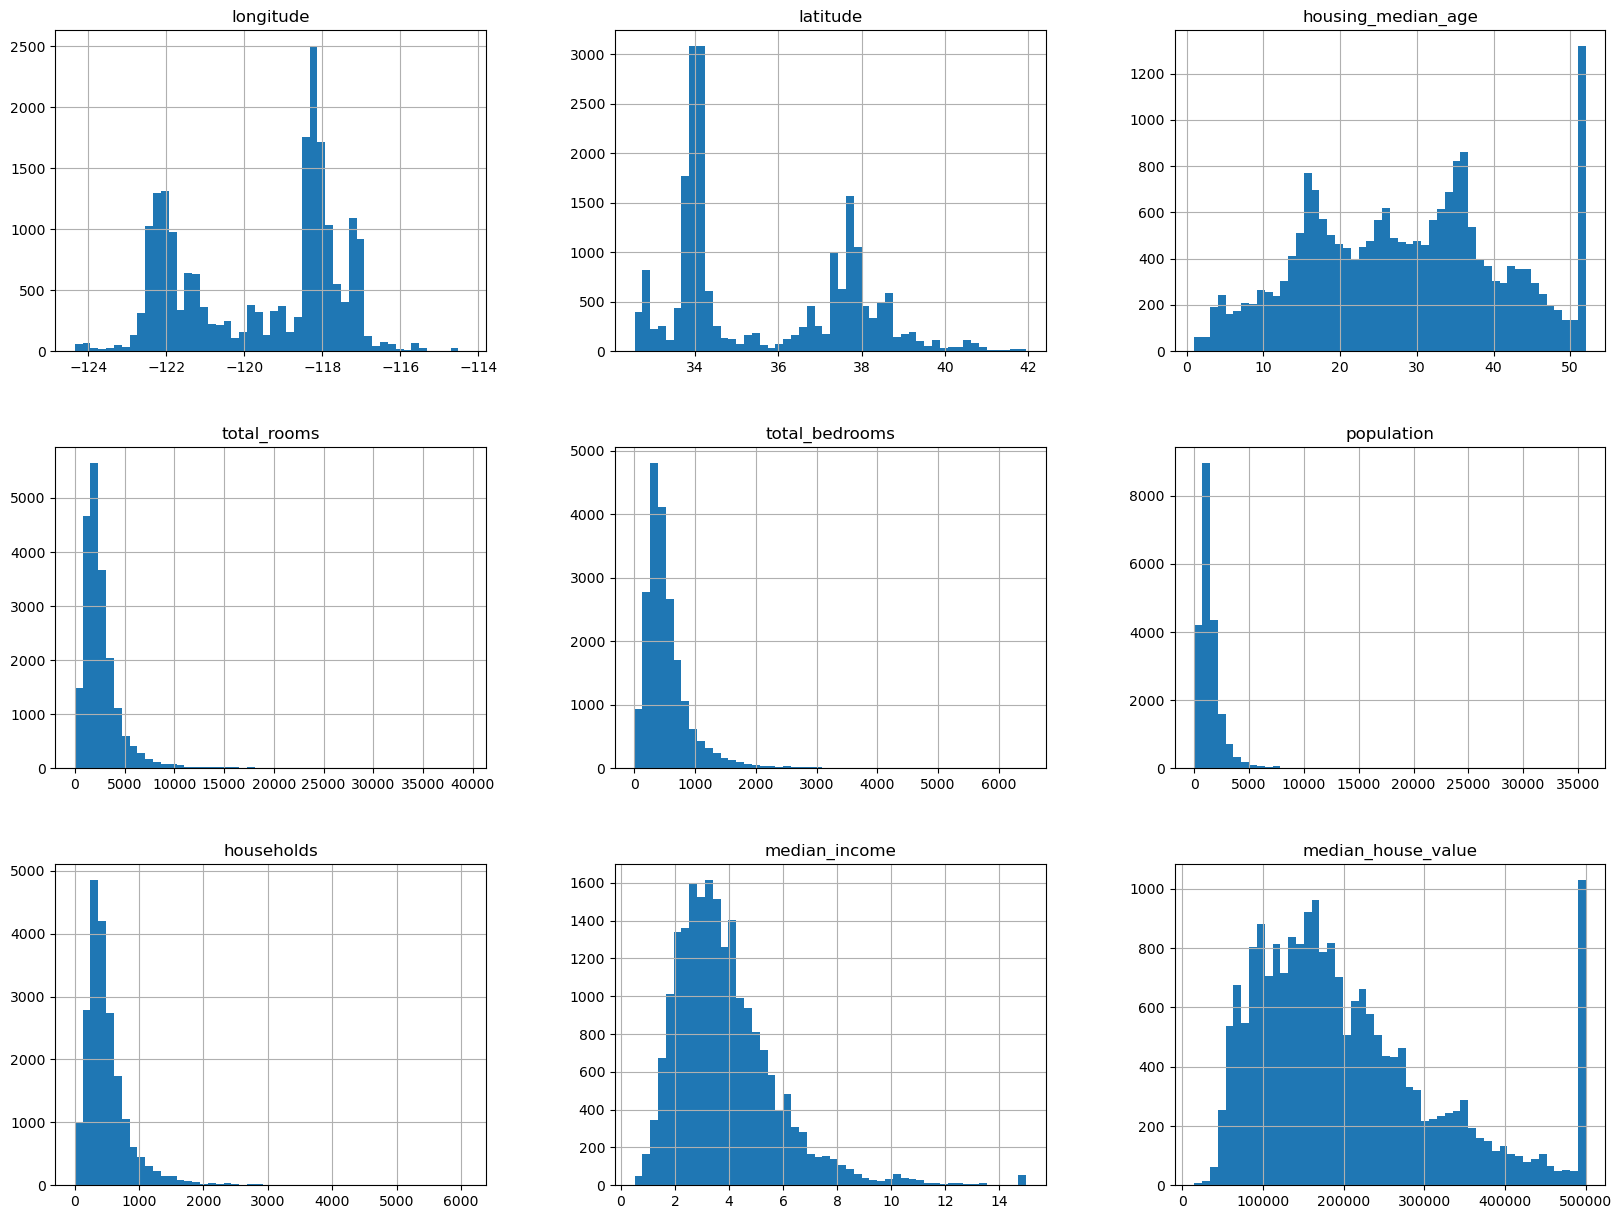

In [102]:
# median_income, median_age, median_value, масштабы и хвосты
hdf.hist(bins = 50, figsize = (20,15)); # графики по каждому столбцу

Визуализация графических данных

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

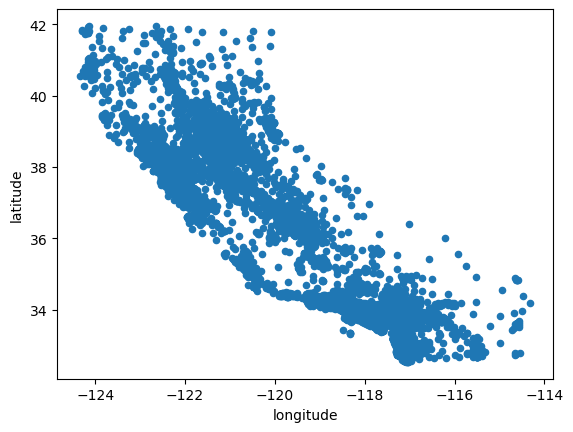

In [103]:
hdf.plot(kind='scatter', x='longitude', y = 'latitude') # визуалтзация значений первых двух столбцов, широты и долготы

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

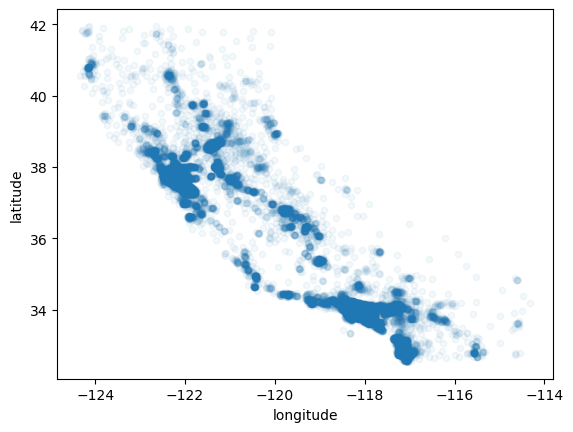

In [104]:
hdf.plot(kind='scatter', x='longitude', y = 'latitude', alpha = 0.05) # визуалтзация значений с прозрачностью

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

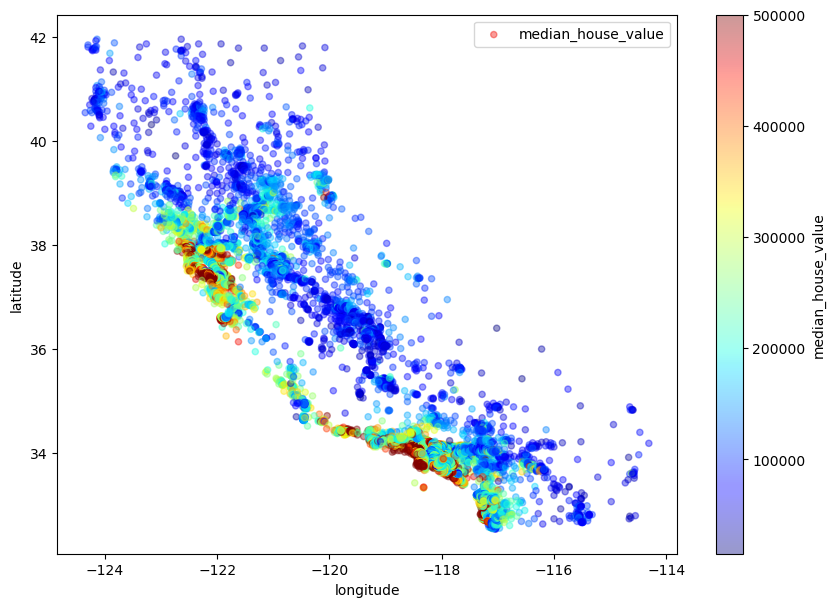

In [105]:
hdf.plot(kind='scatter', x='longitude', y = 'latitude', alpha = 0.4, label = "median_house_value", figsize = (10,7), 
            c = 'median_house_value', cmap = 'jet', colorbar = True) # Расположение домов по стоимости

Поиск зависимостей

In [106]:
corr_M = hdf.corr() # таблица зависимостей между  всеми столбцами
corr_M

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [107]:
corr_M['median_house_value']# зависимость столбца (стоимость жилья) с другими столбцами

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

Графическая матрица зависимостей

In [108]:
from pandas.plotting import scatter_matrix

In [109]:
attributes = ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms'] # выбрали 4 столбца стоим жилья, доходы, возраст дома,кол-во комнат

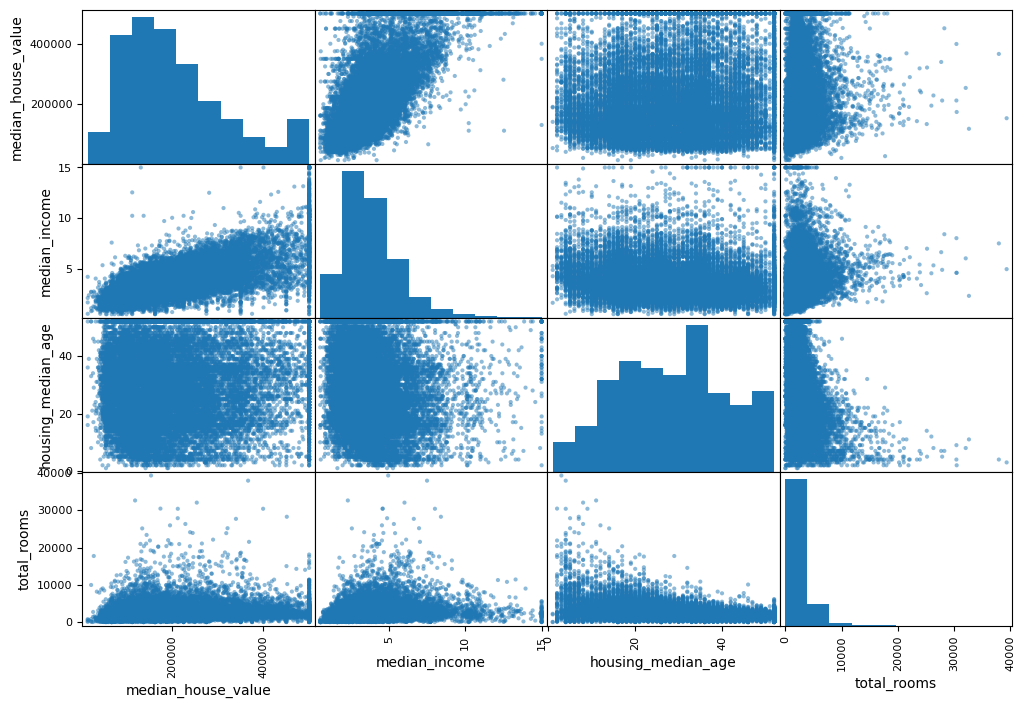

In [110]:
scatter_matrix(hdf[attributes], figsize = (12,8)); # матрица рассеивания между 4мя столбцами стоим жилья, доходы, возраст дома,кол-во комнат

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

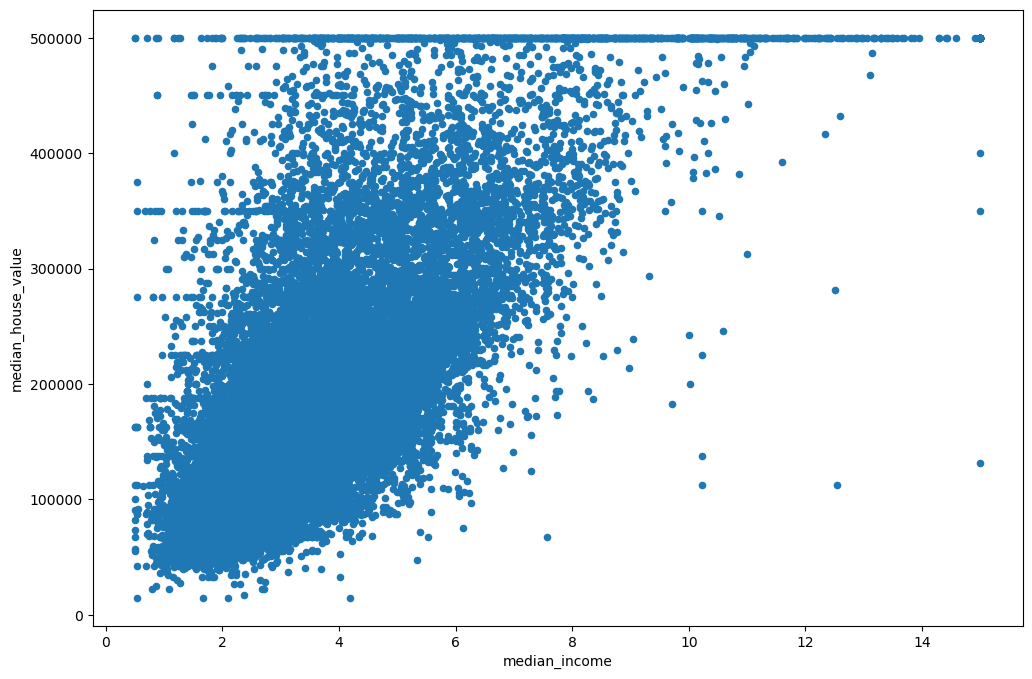

In [111]:
hdf.plot(kind='scatter', x='median_income', y = 'median_house_value', figsize = (12,8)) # матрица рассеивания между стоим жилья и доходами

Обработка пустых значений

In [112]:
hdf.isnull()#.sum() # показыв есть ли 0 строчки

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [113]:
hdf.isnull().sum() # показыв есть ли 0 строчки

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [114]:
#a = hdf.dropna(subset = ['total_bedrooms']) # удалить пустые строчки

In [115]:
#b = hdf.drop(['total_bedrooms'], axis = 1) # удалить столбец где пустые 207 строк

In [116]:
mediantb = hdf['total_bedrooms'].median() # ищем медиану и заполняем прустые строки
hdf['total_bedrooms'].fillna(mediantb, inplace = True)

#medianpbr = hdf['bebrooms_per_room'].median()
#hdf['bebrooms_per_room'].fillna(medianpbr, inplace = True)


In [117]:
#Новые атрибуты

In [118]:
hdf['rooms_per_house'] = hdf['total_rooms'] / hdf['households'] # создаем новые 3 столбца
hdf['bebrooms_per_room'] = hdf['total_bedrooms'] / hdf['total_rooms']
hdf['population_per_house_hold'] = hdf['population'] / hdf['households']

In [119]:
hdf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bebrooms_per_room,population_per_house_hold
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [120]:
corr_M = hdf.corr()  # таблица зависимостей между  всеми столбцами

In [121]:
corr_M['median_house_value'] # таблица зависимостей 1 столбца с другими

longitude                   -0.045967
latitude                    -0.144160
housing_median_age           0.105623
total_rooms                  0.134153
total_bedrooms               0.049457
population                  -0.024650
households                   0.065843
median_income                0.688075
median_house_value           1.000000
rooms_per_house              0.151948
bebrooms_per_room           -0.233303
population_per_house_hold   -0.023737
Name: median_house_value, dtype: float64

In [122]:
# Отделение меток

In [123]:
X = hdf.drop(['median_house_value'], axis = 1) # удаляем графу стоимость домов
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bebrooms_per_room,population_per_house_hold
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,0.219892,2.123209


In [124]:
Y = hdf['median_house_value'] # выделяем графу стоимость домов в отдельную переменную
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

Обработка категориальных признаков

In [125]:
h_cat_en, h_categories = X['ocean_proximity'].factorize() # кодирование, использ для преобразования категор переменных
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bebrooms_per_room,population_per_house_hold
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,0.219892,2.123209


In [126]:
h_cat_en
h_cat_en.reshape(-1,1) # изменяет форму массива без изменения его данных
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bebrooms_per_room,population_per_house_hold
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,0.219892,2.123209


In [127]:
from sklearn.preprocessing import OneHotEncoder

In [128]:
oh = OneHotEncoder() # кодирование, использ для преобразования категор переменных в нужный для ML обучения

In [129]:
coded = oh.fit_transform(h_cat_en.reshape(-1,1))

In [130]:
coded

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [131]:
coded.toarray() # создали матрицу из 5 колонок кодирующие 5 категорий

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [132]:
proxy = pd.DataFrame(coded.toarray(), index = X.index, columns = ['1','2','3','4','5'])# назвали колонки и записали в новую переменную

In [133]:
X = pd.concat([X, proxy], axis = 1) # приклеиваем 5 наших новых столбцов в конец перем Х

In [134]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bebrooms_per_room,population_per_house_hold,1,2,3,4,5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,0.224625,2.560606,0.0,0.0,1.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,0.215208,3.122807,0.0,0.0,1.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,0.215173,2.325635,0.0,0.0,1.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,0.219892,2.123209,0.0,0.0,1.0,0.0,0.0


In [135]:
X = X.drop(['ocean_proximity'], axis = 1) # удаляем категориальный столбец  

In [136]:
# масштабирование и стандартизация значений

In [137]:
#from sklearn.preprocessing import MinMaxScaler # нормализация всех обьектов
#mms = MinMaxScaler() # берет по каждому признаку мин значение, 
                      #мах значение и загоняет все имеющие знач от 0 до 1
#mms.fit_transform(X)

In [138]:
#from sklearn.preprocessing import StandardScaler
#mms = StandardScaler() # центрирование, вычет средней по каждому признаку и разделить на станд отклон
#mm = mms.fit_transform(X)

Создание проверочного набора

In [139]:
from sklearn.model_selection import train_test_split # делим наш дата сет на тестовый и тренировочный 20 к 80%

X_train, X_test, Y_train,  Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 42) # разбиение на 42

In [140]:
X_train.shape # 80 % для тренировки

(16512, 16)

In [141]:
X_test.shape # 20 % для тестирования

(4128, 16)

READY to ROCK

In [175]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [176]:
linreg.fit(X_train, Y_train) # пишем fit  и передаем множество признаков (X_train) и
#множество меток (Y_train) и линейная регрессия натренируется сама и за секунду

LinearRegression()

In [177]:
someData = X_train[:6] # выделяем из трениров множества первые 6 признаков
someLabels = Y_train[:6] # выделяем из трениров множества первые 6 меток

In [178]:
someData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bebrooms_per_room,population_per_house_hold,1,2,3,4,5
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,5.017657,0.200576,3.691814,0.0,0.0,0.0,1.0,0.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.473545,0.232703,1.738095,0.0,0.0,0.0,1.0,0.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,5.645833,0.174486,2.723214,0.0,0.0,0.0,1.0,0.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.002817,0.258269,3.994366,0.0,0.0,0.0,1.0,0.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,6.268421,0.180940,2.300000,0.0,0.0,1.0,0.0,0.0
17848,-121.86,37.42,20.0,5032.0,808.0,2695.0,801.0,6.6227,6.282147,0.160572,3.364544,0.0,1.0,0.0,0.0,0.0


In [179]:
someLabels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
17848    264800.0
Name: median_house_value, dtype: float64

In [180]:
# прогноз нашей натренированой модели
preds = linreg.predict(X) # как будет работать модель на обучающемся множестве

In [181]:
preds

array([407358.61439471, 435823.14466342, 376446.35706545, ...,
        33872.77133236,  46418.73902642,  63216.25162026])

In [182]:
someLabels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
17848    264800.0
Name: median_house_value, dtype: float64

In [183]:
from sklearn.metrics import mean_squared_error # посчитать в абсолютных величинах
# на сколько мы в данном случае отклонились
import math
mse = mean_squared_error(preds, Y) # передаем наш прогноз и наши метки
rmse = math.sqrt(mse)
rmse

68638.30307896764

Дерево решений

In [184]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [185]:
tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [186]:
preds = tree.predict (someData)

In [187]:
mse = mean_squared_error(preds, someLabels) # передаем наш прогноз и наши метки
rmse = math.sqrt(mse)
rmse

0.0

In [188]:
preds = tree.predict (X)

In [190]:
mse = mean_squared_error(preds, Y) # передаем наш прогноз и наши метки
rmse = math.sqrt(mse)
rmse

32899.43197697429

Случайный лес

In [196]:
from sklearn.ensemble import RandomForestRegressor#несколько деревьев использует
forest = RandomForestRegressor()

In [197]:
forest.fit(X_train, Y_train)

RandomForestRegressor()

In [198]:
preds = forest.predict (someData)
preds

array([107568.  , 380225.04, 201861.01,  91103.  ,  96676.  , 278551.01])

In [199]:
mse = mean_squared_error(preds, someLabels) # передаем наш прогноз и наши метки
rmse = math.sqrt(mse)
rmse

13385.229833923913

GRID SEARCH

In [150]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]}

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

In [151]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

In [152]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [153]:
grid_forest = grid_search.best_estimator_
grid_forest

RandomForestRegressor(max_features=6, n_estimators=30)

In [154]:
preds = grid_forest.predict(someData)
preds

array([108620.        , 387470.03333333, 210646.66666667,  92806.66666667,
       100210.        , 267400.        ])